# What is Data Munging?
Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.

# Why Do We Need to Know How to Data Wrangle or Data Munge?
“Even when they can get their hands on the right data, data scientists need to time to explore and understand it. The data may be in a format that can’t be easily analyzed, and with little to no metadata to help, the data scientist may need to seek advice from the data owner. After all this, the data still needs to be prepared for analysis. This involves formatting, cleaning and sampling the data. In some cases, scaling, decomposition and aggregation transformations are required before data scientists are ready to start training the models.”

https://www.infoworld.com/article/3228245/the-80-20-data-science-dilemma.html

# 80/20 Rule in Data Science
“The reason data scientists are hired in the first place is to develop algorithms and build machine learning models—and these are typically the parts of the job that they enjoy most. Yet in most companies today, 80 percent of a data scientist’s valuable time is spent simply finding, cleaning and reorganizing huge amounts of data.” Only 20 percent of their time is spent on actual data analysis. Without the right tools, this task is insurmountable."
https://www.infoworld.com/article/3228245/the-80-20-data-science-dilemma.html

- Data Munging Part I: Working With Missing Values
- Data Munging Part II: Put two datasets together to create one dataset


# Lab 8 Data Munging: Part I

In this lab we will learn how to do two things:

1. Work with dataset that is missing values
2. Use regex to remove html tags from your data

For this lab, we'll need these libraries:

1. Pandas: We will need Pandas to navigate our dataframe and check for each column’s data type, null values, and unique values.
2. NumPy: This package is essential for any data science project. It has a lot of mathematical functions that operate on multi-dimensional arrays and data frames.
3. Matplotlib & Seaborn: They are plotting and graphing libraries that we will use to visualize data in an intuitive way.

Note: regex are tricky. Practice regex more using other tutorials like those at datacamp and tutorialspoint


In [2]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

# Loading the Data
Let’s load our data

# Question 1. Write the code to load in the jeopardy.csv into your Notebook
# Question 1a. Write the shape function to view the total rows and columns in your data
Note: You should upload your jeopardy.csv into its own folder caleld data OR
upload it into it's current folder

In [3]:
jeopardy = pd.read_csv("jeopardy_df.csv")
print(jeopardy.shape)

(19999, 7)


# Question 1b. Why might it be better toinclude all your data files under there own directory? Write the answer below.

Now let's take a look at the data

# Question 2. Write the code that prints a summary of the dataframe

In [4]:
print(jeopardy.info)
# Its better to include all your data files under there own directory becuase it keeps you organized and allows you to remeber were files are along with related files.

<bound method DataFrame.info of        Show Number  Air Date      Round                         Category  \
0             4680  12/31/04  Jeopardy!                          HISTORY   
1             4680  12/31/04  Jeopardy!  ESPN's TOP 10 ALL-TIME ATHLETES   
2             4680  12/31/04  Jeopardy!      EVERYBODY TALKS ABOUT IT...   
3             4680  12/31/04  Jeopardy!                 THE COMPANY LINE   
4             4680  12/31/04  Jeopardy!              EPITAPHS & TRIBUTES   
...            ...       ...        ...                              ...   
19994         3582   3/14/00  Jeopardy!                   U.S. GEOGRAPHY   
19995         3582   3/14/00  Jeopardy!               POP MUSIC PAIRINGS   
19996         3582   3/14/00  Jeopardy!                  HISTORIC PEOPLE   
19997         3582   3/14/00  Jeopardy!                  1998 QUOTATIONS   
19998         3582   3/14/00  Jeopardy!                       LLAMA-RAMA   

       Value                                           

# Question 3. Write the code that prints the first 25 rows of the dataframe

In [5]:
jeopardy.iloc[:25]

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/04,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
5,4680,12/31/04,Jeopardy!,3-LETTER WORDS,$200,"In the title of an Aesop fable, this insect sh...",the ant
6,4680,12/31/04,Jeopardy!,HISTORY,$400,Built in 312 B.C. to link Rome & the South of ...,the Appian Way
7,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$400,"No. 8: 30 steals for the Birmingham Barons; 2,...",Michael Jordan
8,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$400,"In the winter of 1971-72, a record 1,122 inche...",Washington
9,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$400,This housewares store was named for the packag...,Crate & Barrel


Now that we've seen a summary of the dataset, it may be necessary to view an entire column of data
To print the entire Category column, I would normally write:
print(jeopardy['Category'))

What if I wanted to print the Category value for Row number 205?


# Question 4. Write the code to print the Category, Question, and Answer values for Row Number 205

In [20]:
print(jeopardy.iloc[204][3])
print(jeopardy.iloc[204][5])
print(jeopardy.iloc[204][6])

THE EYES HAVE IT
People say these are what you need to make it in Hollywood
Contacts


You should have received an error. What possibly could have went wrong?
 
# Question 5. Post the error below (if any)

A KeyError with the word Category. 


# Question 6. What's the problem with all of the category names in our dataset?
Write you guess below as to why the column names are not being found

The problem is they have Capital letters and extra spaces.

In [31]:
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
/opt/tljh/user/lib/python3.7/site-packages/pandas/core/indexes/base.py in get_value(self, series, key)
   4410             try:
-> 4411                 return libindex.get_value_at(s, key)
   4412             except IndexError:

pandas/_libs/index.pyx in pandas._libs.index.get_value_at()

pandas/_libs/index.pyx in pandas._libs.index.get_value_at()

pandas/_libs/util.pxd in pandas._libs.util.get_value_at()

pandas/_libs/util.pxd in pandas._libs.util.validate_indexer()

TypeError: 'str' object cannot be interpreted as an integer

During handling of the above exception, another exception occurred:

KeyError                                  Traceback (most recent call last)
<ipython-input-5-144320cff189> in <module>
----> 1 print(jeopardy.iloc[204]['Category'])
      2 print(jeopardy.iloc[204]['Question'])
      3 print(jeopardy.iloc[204]['Answer'])

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/series.py in __getitem__(self, key)
    869         key = com.apply_if_callable(key, self)
    870         try:
--> 871             result = self.index.get_value(self, key)
    872 
    873             if not is_scalar(result):

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/indexes/base.py in get_value(self, series, key)
   4417                     raise InvalidIndexError(key)
   4418                 else:
-> 4419                     raise e1
   4420             except Exception:
   4421                 raise e1

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/indexes/base.py in get_value(self, series, key)
   4403         k = self._convert_scalar_indexer(k, kind="getitem")
   4404         try:
-> 4405             return self._engine.get_value(s, k, tz=getattr(series.dtype, "tz", None))
   4406         except KeyError as e1:
   4407             if len(self) > 0 and (self.holds_integer() or self.is_boolean()):

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_value()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_value()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'Category'

SyntaxError: invalid syntax (<ipython-input-31-285cc737450b>, line 1)

In [32]:
# The column should come before the index is selected that is the project syntax for getting an item. 

# Let's begin our Exploratory Data Analysis

Exploratory data analysis may involve removing extra spaces or cleaning up your data.
It may also involve visualizing the data. 
In order to do that though, you may need to remove missing values, whitespace, or other errors that may occur in the dataset.

# Removing Leading Whitespace

Sometimes you will receive a dataset that has trailing or ending whitespace that occurs with the column names. This commonly occurs if data is scraped from the web.  
This will cause errors to occur when trying to extract data from columns.
There are two ways you can do this:

1. Rename the column names to what you want them to be or
2. Remove the whitespace in the front

In some cases you may spend too much time trying to figure out what is going on with your column names. May be just easier to rename them. 

We're going to do both in this Lab

When removing whitespace we can use the str.replace function
jeopardy.columns=jeopardy.columns.str.replace(' ', '')

# Question 7. Write the code to remove the whitespace that occurs in the jeopardy dataframe for all columns

In [21]:
jeopardy.columns = jeopardy.columns.str.replace(' ', '')
jeopardy

,ShowNumber,AirDate,Round,Category,Value,Question,Answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/04,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
19994,3582,3/14/00,Jeopardy!,U.S. GEOGRAPHY,$200,"Of 8, 12 or 18, the number of U.S. states that...",18
19995,3582,3/14/00,Jeopardy!,POP MUSIC PAIRINGS,$200,...& the New Power Generation,Prince
19996,3582,3/14/00,Jeopardy!,HISTORIC PEOPLE,$200,In 1589 he was appointed professor of mathemat...,Galileo
19997,3582,3/14/00,Jeopardy!,1998 QUOTATIONS,$200,"Before the grand jury she said, ""I'm really so...",Monica Lewinsky


#  Question 8. Write the code to print the 205th row in the jeopardy dataframe for the Category, Question, and Answer columns

In [34]:
print(jeopardy['Category'].iloc[205])
print(jeopardy['Question'].iloc[205])
print(jeopardy['Answer'].iloc[205])

ALASKA
4 different species of bears live in Alaska:  Kodiak, grizzly, black & this
Polar bears


Sometimes you will need to rename columns names so that they are more meaningful to your analysis.
To rename a column we can use the rename function

df.rename(columns={'Column To Be Renames': 'New Name Of Column'},
          inplace=True)

# Question 9. Write the code to rename the Category column to Genre. 

In [35]:
jeopardy.rename(columns={'Category': 'Genre'}, inplace=True)
jeopardy

,ShowNumber,AirDate,Round,Genre,Value,Question,Answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/04,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
19994,3582,3/14/00,Jeopardy!,U.S. GEOGRAPHY,$200,"Of 8, 12 or 18, the number of U.S. states that...",18
19995,3582,3/14/00,Jeopardy!,POP MUSIC PAIRINGS,$200,...& the New Power Generation,Prince
19996,3582,3/14/00,Jeopardy!,HISTORIC PEOPLE,$200,In 1589 he was appointed professor of mathemat...,Galileo
19997,3582,3/14/00,Jeopardy!,1998 QUOTATIONS,$200,"Before the grand jury she said, ""I'm really so...",Monica Lewinsky


# Question 10. Write the code to view the first column names and first ten rows of the data

In [36]:
jeopardy.iloc[:10]

,ShowNumber,AirDate,Round,Genre,Value,Question,Answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/04,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
5,4680,12/31/04,Jeopardy!,3-LETTER WORDS,$200,"In the title of an Aesop fable, this insect sh...",the ant
6,4680,12/31/04,Jeopardy!,HISTORY,$400,Built in 312 B.C. to link Rome & the South of ...,the Appian Way
7,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$400,"No. 8: 30 steals for the Birmingham Barons; 2,...",Michael Jordan
8,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$400,"In the winter of 1971-72, a record 1,122 inche...",Washington
9,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$400,This housewares store was named for the packag...,Crate & Barrel


# Question 11. Put the code below to change the Genre column back to Category.
Make to use the head function to view your rename results


In [37]:
jeopardy.rename(columns={'Genre': 'Category'}, inplace=True)
jeopardy.head()

,ShowNumber,AirDate,Round,Category,Value,Question,Answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/04,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


To begin exploratory analysis of the jeorpardy dataset, use the shape() function to return the dimensionality of the dataset or the total number of columns and rows of the dataframe.
df.shape()
where df is the name of the dataframe

# Question 12. Write the code to view the number of rows and columns in the dataframe jeopardy

In [38]:
jeopardy.shape

(19999, 7)

We see that our data has 20000 rows and 8 columns

When you printed the first 25 rows, did you see any missing values or Not A Number values?



There is an easier ways to check for missing values or Not A Number (NANs) in your dataframe rather than looking through the entire dataset manually. In some cases the missing values are shown as NaNs or just blank cells in the dataframe.

There are four ways:

# 1. Check for NAN under a single dataframe column
To do this you would use the command df['column_name'].isnull().values.any()
where df is the name of your dataframe and column_name is the name of the column

Let's check for missing value under the Answer column

# Question 13. Write the code to check for missing values from the Answer column 

In [39]:
jeopardy['Answer'].isnull().values.any()

True

# Question 14. Are there NANs in the Answer column. Put your answer below

# (2) Count the NaN under a single DataFrame column:

df['your column name'].isnull().sum()

df is the name of your dataframe

In [40]:
# Yes

# Question 15. Count the NAN under the Category column. Write your answer below and run the output

In [41]:
jeopardy['Category'].isnull().sum()

0

# (3) Check for NaN under an entire DataFrame:
df.isnull().values.any()

df is the name of your dataframe


# Question 16. Write the answer to check the entire jeopardy dataframe for NANs.


In [42]:
jeopardy.isnull().values.any()

True

# (4) Count the NaN under an entire DataFrame:

df.isnull().sum().sum()

df is the name of the dataframe

# Question 17. Write the answer to count the number of missing values from the entire DataFrame

Note: You can use isna or isnull


In [43]:
jeopardy.isnull().sum().sum()

6

There are missing values that need to be dealt with 
In some cases you can replace them all if the data for each column was the same. ie all strings or all numbers.

# Question 18. How would you treat replacing all of the missing values in your jeopardy dataset? What about for columns that are strings? What about for columns that are values?

Write your answer below. 


In [44]:
#  I believe the be way to treat reaplacing all of the missing valus in the jepardy dataset would be to replace the missing values with the average of the column.

# Getting the Index or indices of the missing values in your dataframe
df[df['column_name'].isnull()]

Note: Characters such as empty strings ‘’ or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True).

# Question 19. # Write the code to get the indices of the missing values in the jeopardy dataframe for the columns Question, Answer, Round, Value, Category

In [45]:
jeopardy

,ShowNumber,AirDate,Round,Category,Value,Question,Answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/04,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
19994,3582,3/14/00,Jeopardy!,U.S. GEOGRAPHY,$200,"Of 8, 12 or 18, the number of U.S. states that...",18
19995,3582,3/14/00,Jeopardy!,POP MUSIC PAIRINGS,$200,...& the New Power Generation,Prince
19996,3582,3/14/00,Jeopardy!,HISTORIC PEOPLE,$200,In 1589 he was appointed professor of mathemat...,Galileo
19997,3582,3/14/00,Jeopardy!,1998 QUOTATIONS,$200,"Before the grand jury she said, ""I'm really so...",Monica Lewinsky


In [32]:
jeopardy['Question'].isnull().sum()

 

2

In [33]:
print("Question indices:")
print(jeopardy[jeopardy['Question'].isnull()].index.tolist())

print("Answers indices:")
print(jeopardy[jeopardy['Answer'].isnull()].index.tolist())

print("Value indices:")
print(jeopardy[jeopardy['Value'].isnull()].index.tolist())

print("Category indices:")
print(jeopardy[jeopardy['Category'].isnull()].index.tolist())

Question indices:
[321, 388]
Answers indices:
[112, 260]
Value indices:
[588]
Category indices:
[]


# More Dealing with Missing Data 

In most cases you will drop or delete those rows from the dataset that you  are analyzing

However, if you yare dealing with a datset that is small and you need all the data necessary to analyze the problem, you may want to check back with the datasource to look for those missing values.

In some easier cases you can check online resources to try and fill in the missing data. This is tricky those because the data on the internet is not always correct and you are taking a chance in using the values you find in your analysis.

In [40]:
#jeopardy.isnull().sum().index.tolist()
rows_with_nan = []
for index, row in jeopardy.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

print(rows_with_nan)

[112, 174, 260, 321, 388, 588]


# Let's remove the missing values from our dataframe and print the number of rows in the dataset after removing missing data rows
To do this we use the drop function and the syntax:
    df.drop(index_list, inplace=True)
    
   where df is the data frame and the index_list is an array of row indices to remove from the data frame

In [41]:
jeopardy.drop(rows_with_nan, inplace=True)
jeopardy.shape

(19993, 7)

# Now the easy way to drop missing values from your dataframe
You can also use the dropna command 

df.dropna(inplace = True) 

where df is the dataframe

# Let's move on to visualizing aspects about the data now that values are not missing
1. Visualize the top 10 answers

Japan        22
Canada       19
China        19
Australia    19
India        19
Name: Answer, dtype: int64


Text(0.5, 1.0, 'Top 10 Answer Distribution')

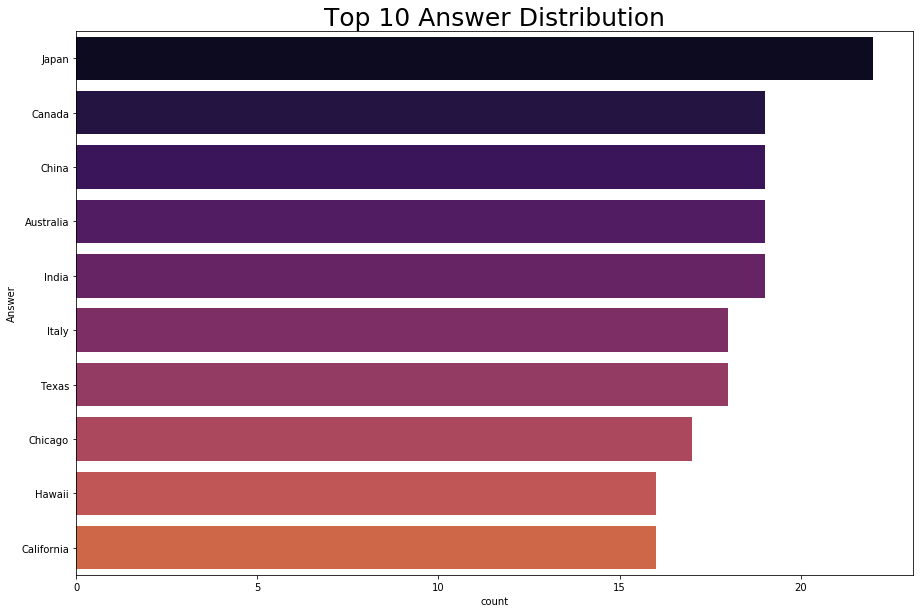

In [75]:
# Edit the code below to create a variable called top_10 that takes the top ten answers from the Answer column
top_10 = jeopardy['Answer'].value_counts()[:10]
print(top_10.head())

mask = jeopardy['Answer'].map(lambda x: x in top_10.index.tolist())
sns.countplot(y='Answer', data=jeopardy[mask], palette=sns.color_palette('inferno', 15), order=top_10.index.tolist())
plt.gcf().set_size_inches(15,10)
plt.title('Top 10 Answer Distribution', size=25)

# Question 20. Describe what you think the value_counts function is doing below

The value_counts funciton counts the number of answers that are the same.


# Explanation of the code above
The value_counts() function counts the number of answers that are the same.
This is stored in the variable top_10
The [:10] grabs the first ten rows in the dataframe

The rest of the code uses the seaborn library to create a horizontal bar to visuzlie the top 10 most common answers from the Jeopary dataset

In [76]:
# Repeat the same process to get the top 10 most popular questions. Don't plot it
top_10_Q = jeopardy['Question'].value_counts()[:10]
print(top_10_Q.head())

Adam Levine                                                                                                              2
Common in Dixie, a razorback is a wild one of these                                                                      2
"His pride had cast him out from heaven, with all his host of rebel angels"                                              2
1967: "We rob banks"                                                                                                     2
In Nicolai's opera "The Merry Wives of Windsor", this fat, funny rogue gets dumped into the river in a laundry basket    2
Name: Question, dtype: int64


# Question 21. What do you notice about your Plot. Write the answer below
Japan has the highest Answer disturbution, and Califonia has the smallest answer disturbtion.

The method we used for Question 18 won't work for this question.  
Remove the [:10] from the end of value_counts()

# Write the code without the value_counts at the end

In [42]:
top_10_Q = jeopardy['Question'].value_counts()
print(top_10_Q.head())

[audio clue]                                                                   5
"His pride had cast him out from heaven, with all his host of rebel angels"    2
Common in Dixie, a razorback is a wild one of these                            2
These "fell great oaks"                                                        2
1967: "We rob banks"                                                           2
Name: Question, dtype: int64


# Notice that [audio clue] is included as a value for the Question column
We can only assume that Jeopardy provides a audio clue rather than a textual question to the contestant. This is not helpful for our analysis as it occurs five times in the dataset and the audio clip is not known.

This value is not useful and this row should be removed

# Question 22 . Write the code to remove the row with '[audio clue]' listed as a value for the Question column

In [50]:
jeopardy[jeopardy['Question'] == '[audio clue]']

,ShowNumber,AirDate,Round,Category,Value,Question,Answer
19445,3154,4/23/98,Jeopardy!,MEET THE BEATLES,$100,[audio clue],"""I Want to Hold Your Hand"""
19451,3154,4/23/98,Jeopardy!,MEET THE BEATLES,$200,[audio clue],"""Can't Buy Me Love"""
19457,3154,4/23/98,Jeopardy!,MEET THE BEATLES,$300,[audio clue],"""Eight Days A Week"""
19463,3154,4/23/98,Jeopardy!,MEET THE BEATLES,$400,[audio clue],"""Ticket to Ride"""
19469,3154,4/23/98,Jeopardy!,MEET THE BEATLES,$500,[audio clue],"""We Can Work It Out"""


In [49]:
#jeopardy['Question'] ==
#print(jeopardy[jeopardy['Question'] == '[audio clue]'].index.values)
#jeopardy[jeopardy['Question'] == '[audio clue]']
audio_clue_list = jeopardy[jeopardy['Question'] == '[audio clue]'].index.values
audio_clue_list

array([19445, 19451, 19457, 19463, 19469])

In [51]:
jeopardy.drop(audio_clue_list, inplace=True)

In [79]:
jeopardy.shape

(19988, 9)

# Text Preprocessing
Some of the values have URLs and HTML tags embedded within them
We will need to clean that up before we can analyze the data

We can use pandas regular expressions functions

Instead of munging the original data, it is better to copy the data into new column
This new column is called jeopardy['without_tags']

You should never overwrite the a column in your original dataset, rather add on to it because you'll never know if and when you'll need the original data to perform another operation.

# Question 23. Write the code to import the regular expression libary

In [54]:
#jeopardy['without_tags']
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [55]:
# We will write a function called remove_tags to remove the html tags from any string you pass it
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
jeopardy['without_tags'] = jeopardy['Question'].apply(lambda cw :remove_tags(cw))
print("\nSentences without tags:")
print(jeopardy['without_tags'])


Sentences without tags:
0        For the last 8 years of his life, Galileo was ...
1        No. 2: 1912 Olympian; football star at Carlisl...
2        The city of Yuma in this state has a record av...
3        In 1963, live on "The Art Linkletter Show", th...
4        Signer of the Dec. of Indep., framer of the Co...
                               ...                        
19994    Of 8, 12 or 18, the number of U.S. states that...
19995                        ...& the New Power Generation
19996    In 1589 he was appointed professor of mathemat...
19997    Before the grand jury she said, "I'm really so...
19998    Llamas are the heftiest South American members...
Name: without_tags, Length: 19988, dtype: object


# Let's double-check our work to see if that worked
Write the code to print out the old Question column data for row 30 that still  had html tags in it. 

Name this variable old_html_data

In [56]:
old_html_data = jeopardy['Question'][29]
print(old_html_data)

<a href="http://www.j-archive.com/media/2004-12-31_DJ_23.mp3">Beyond ovoid abandonment, beyond ovoid betrayal... you won't believe the ending when he "Hatches the Egg"</a>


# Question 24. Write the code to print out the question column for row 30 without html in it. 
Name it new_data

In [57]:
jeopardy['without_tags'][29]

'Beyond ovoid abandonment, beyond ovoid betrayal... you won\'t believe the ending when he "Hatches the Egg"'

# Making everything upper or lowercase
Sometimes you will need to compare strings. To easily compare strings you should convert them to either upper or lowercase

In [58]:
old_html_data.lower()

'<a href="http://www.j-archive.com/media/2004-12-31_dj_23.mp3">beyond ovoid abandonment, beyond ovoid betrayal... you won\'t believe the ending when he "hatches the egg"</a>'

In [59]:
old_html_data.upper()

'<A HREF="HTTP://WWW.J-ARCHIVE.COM/MEDIA/2004-12-31_DJ_23.MP3">BEYOND OVOID ABANDONMENT, BEYOND OVOID BETRAYAL... YOU WON\'T BELIEVE THE ENDING WHEN HE "HATCHES THE EGG"</A>'

# Question 25. Write the code to change the 'Answer' column to all lower case. 
Your new column should be called jeopardary['lower_answer']
Print row number 25 before and after turning to lower case

In [62]:
# jeopardary['lower_answer'] 
def change_to_lowercase(string):
    result = string.lower()
    return result
jeopardy['lower_answer'] = jeopardy['Answer'].apply(lambda cw :change_to_lowercase(cw))
print(jeopardy['lower_answer'][24])

the congress party
